In [43]:
import matplotlib.pyplot as plt
import torch
from glob import glob

from PIL import Image
import numpy as np

In [179]:
from datasets.styletransfer import StyleTransferDataset
from torch.utils.data import DataLoader
from torchvision import transforms

transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256, 256)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

valid_dataset = StyleTransferDataset(root="data/monet2photo/", train=False, cache=True, transform=transforms)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False)

In [180]:
from models.cycle_gan_resnet import CycleGANResNet
model = CycleGANResNet((3,256,256), (3,256,256), gen_n_filters=32, disc_n_filters=64, name='model', device='cpu', is_train=False, lr =0.2)

In [181]:
checkpoints = torch.load("logs/CYCLE-GAN-RESNET/expr_20251114_185214/CYCLE-GAN-RESNET_checkpoint_epoch_120_latest.pth", weights_only=False)

In [182]:
model.load_checkpoint(checkpoints["model"])

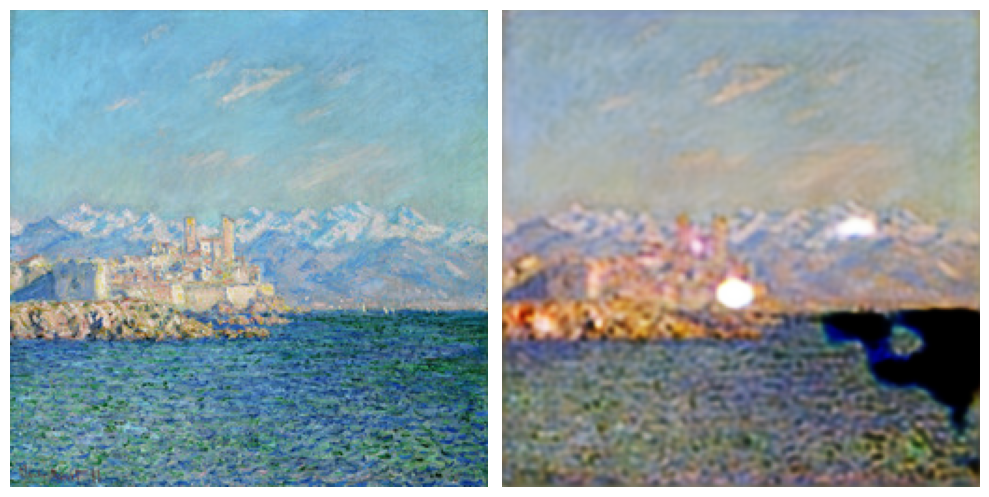

In [194]:
img = valid_dataset[4][0]
before = img.numpy().transpose(1,2,0) * 0.5 + 0.5
after = model.G_ba(img.unsqueeze(0)).squeeze(0).detach().numpy().transpose(1,2,0) * 0.5 + 0.5

flg, axes = plt.subplots(1, 2, figsize=(10,20))
axes[0].imshow(before)
axes[0].axis('off')
axes[1].imshow(after)
axes[1].axis('off')
plt.tight_layout()
plt.show()

In [191]:
valid_dataset.a[4:6]

array([[[[0.40392157, 0.6       , 0.63529414],
         [0.39215687, 0.59607846, 0.64705884],
         [0.38039216, 0.60784316, 0.6627451 ],
         ...,
         [0.40392157, 0.5803922 , 0.5921569 ],
         [0.42352942, 0.5921569 , 0.5647059 ],
         [0.42352942, 0.5882353 , 0.53333336]],

        [[0.41960785, 0.6156863 , 0.6509804 ],
         [0.40392157, 0.6156863 , 0.6627451 ],
         [0.40392157, 0.6313726 , 0.6862745 ],
         ...,
         [0.4509804 , 0.64705884, 0.6901961 ],
         [0.4627451 , 0.6509804 , 0.6666667 ],
         [0.45882353, 0.6392157 , 0.627451  ]],

        [[0.4392157 , 0.63529414, 0.6784314 ],
         [0.4117647 , 0.62352943, 0.67058825],
         [0.40392157, 0.627451  , 0.69411767],
         ...,
         [0.45882353, 0.6745098 , 0.7529412 ],
         [0.46666667, 0.67058825, 0.7254902 ],
         [0.4509804 , 0.64705884, 0.68235296]],

        ...,

        [[0.22745098, 0.40784314, 0.29411766],
         [0.08235294, 0.3137255 , 0.22745098]